Team Number: 13

Riya Anil: PES2UG20CS276

Riya Joseph: PES2UG20CS278

Roslyn Pius: PES2UG20CS285

Sharanya Mishra: PES2UG20CS323

**Language:** Python3

Libraries used:

Panda: 1.5.3

Numpy: 1.22.4

sklearn:1.2.2

networkx: 3.1

pytorch: 2.0.0+cu118

seaborn: 0.12.2

infomap: 2.7.1

matplotlib: 3.7.1

**Through our project, we explore the use of network analysis to identify community structures and patterns in butterfly species similarity networks. We have focused primarily on 10 butterfly species and analyzed their similarities based on wing color patterns.The datsets used consists of a binary network wherein, an edge between the two species exist if they share atleast one similar pattern and a weighted network where weights are assigned to edges based on the number of similar patterns between two species.**

In [4]:
!pip install infomap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached infomap-2.7.1.tar.gz (263 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for infomap: filename=infomap-2.7.1-cp310-cp310-linux_x86_64.whl size=8809324 sha256=b44f83f60f9a2b04cd34c16c41c37c97a41122fe4664c44309c1965256864e7e
  Stored in directory: /root/.cache/pip/wheels/e4/01/53/fd7c62079098140cd582b999592b4592c0dad7300cac32b6e1
Successfully built infomap


In [5]:
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torch_geometric-2.3.1.tar.gz (661 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910476 sha256=d87c97bd2b3925953069add33587298433c03bd71b70e371a76d9602edfe14aa
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib
import sklearn 
import community
import numpy as np
import pandas as pd
from matplotlib import cm
from community import community_louvain
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import infomap

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

##**Actual Label Visualisation:**

In [9]:
G = nx.read_edgelist("/content/SS-Butterfly_weights.csv", delimiter=',', nodetype=int, data=(('weight',float),))
labels = pd.read_csv("/content/SS-Butterfly_labels.csv")
for index, row in labels.iterrows():
    G.nodes[row["# Node_ID"]]["label"] = row["Species"]

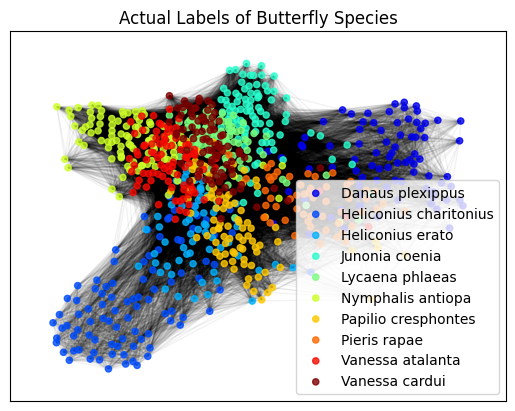

In [10]:
LabelName = {1: "Danaus plexippus", 2:"Heliconius charitonius", 3:"Heliconius erato", \
                4:"Junonia coenia", 5:"Lycaena phlaeas", 6:"Nymphalis antiopa", 7:"Papilio cresphontes",\
                8:"Pieris rapae", 9:"Vanessa atalanta", 10:"Vanessa cardui"}

ActualLabel = {1: "Danaus plexippus", 174:"Heliconius charitonius", 175:"Heliconius erato", \
                237:"Junonia coenia", 410:"Lycaena phlaeas", 513:"Nymphalis antiopa", 315:"Papilio cresphontes",\
                657:"Pieris rapae", 747:"Vanessa atalanta", 748:"Vanessa cardui"}
fig = plt.figure()
pos = nx.spring_layout(G)
for label in range(1,11,1):
    new_nodes = labels[labels["Species"] == label]["# Node_ID"].tolist()
    p = nx.draw_networkx_nodes(G, pos, new_nodes, node_size = 20, label=LabelName[label],
                                node_color = [cm.jet(int(label/10.*255))[:3]]*len(new_nodes), 
                                alpha=0.8)
plt.title("Actual Labels of Butterfly Species")
nx.draw_networkx_edges(G, pos, alpha=0.05)
plt.legend()

#**CLUSTERING METHODS:**

###1)SPECTRAL CLUSTERING:
Spectral clustering is a technique for clustering data points based on their similarity. It works by representing the data points as nodes in a graph and using the graph's eigenvalues and eigenvectors to group similar nodes together.

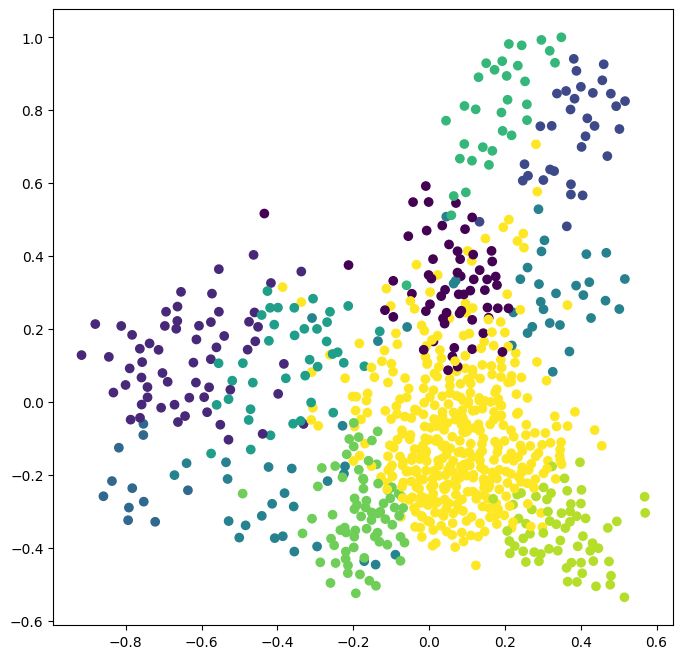

In [11]:
# Get the adjacency matrix of the graph
adj_matrix = nx.to_numpy_array(G)

# Compute the Laplacian matrix of the graph
L = nx.laplacian_matrix(G)

# Compute the first k eigenvectors of the Laplacian matrix
eigvals, eigvecs = np.linalg.eigh(L.todense())
X = eigvecs[:, :12]

# Perform spectral clustering
spectral = SpectralClustering(n_clusters=10, affinity='precomputed')
spectral.fit(adj_matrix)
labels = spectral.labels_


# Get the positions of the nodes using the spring layout algorithm
pos = nx.spring_layout(G)

# Convert pos to a numpy array
pos = np.array(list(pos.values()))

# Create a scatter plot of the nodes with different colors for each cluster
plt.figure(figsize=(8, 8))
plt.scatter(pos[:, 0], pos[:, 1], c=spectral.labels_, cmap='viridis')
plt.show()

##2) K-MEANS:
K-means is a clustering algorithm used for grouping similar data points together into clusters. It is a simple and widely used unsupervised learning algorithm that is particularly useful for large datasets.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


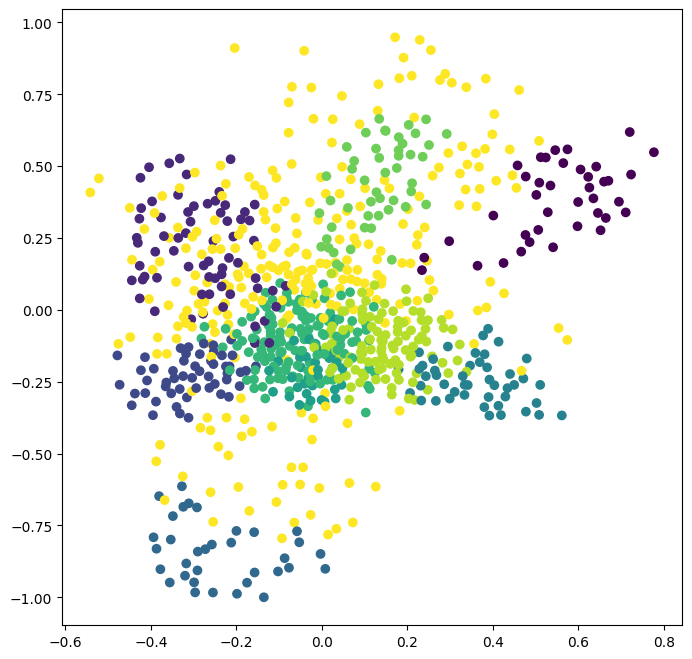

In [12]:
# Get the adjacency matrix of the graph
adj_matrix = nx.to_numpy_array(G)

# Perform k-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(adj_matrix)

# Get the positions of the nodes using the spring layout algorithm
pos = nx.spring_layout(G)

# Convert pos to a numpy array
pos = np.array(list(pos.values()))

# Create a scatter plot of the nodes with different colors for each cluster
plt.figure(figsize=(8, 8))
plt.scatter(pos[:, 0], pos[:, 1], c=kmeans.labels_, cmap='viridis')
plt.show()

In [13]:
# Compare the accuracy of the two methods using the silhouette score
spectral_silhouette = silhouette_score(adj_matrix, spectral.labels_)
kmeans_silhouette = silhouette_score(adj_matrix, kmeans.labels_)

print("Spectral clustering silhouette score:", spectral_silhouette)
print("K-means clustering silhouette score:", kmeans_silhouette)

Spectral clustering silhouette score: 0.042438029932864565
K-means clustering silhouette score: 0.07518896950694677


In [14]:
# Compute the modularity of the spectral clustering result
Q = nx.algorithms.community.modularity(G, [set(np.where(labels == i)[0]) for i in range(10)])

print('Modularity of the spectral clustering result:', Q)

Modularity of the spectral clustering result: 0.04081958699172332


##**COMMUNITY DETECTION METHODS:**

##1) Louvain Method:
The Louvain method is a community detection algorithm used to identify communities or clusters in complex networks. It is based on the concept of modularity, which measures the density of edges within communities compared to edges between communities.

7.0


<ipython-input-15-71762f4168a6>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('jet'), vmin=0.,vmax=1.,


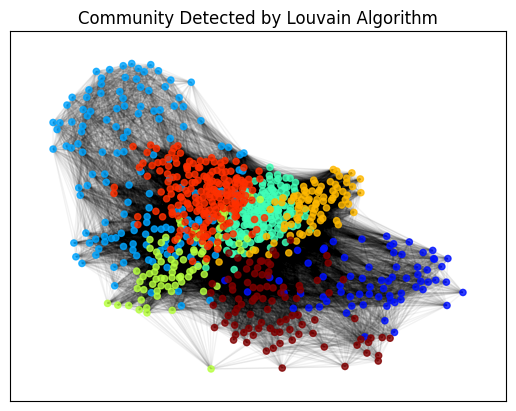

In [15]:
#first compute the best partition
partition = community_louvain.best_partition(G)
colorMap = {1:'b', 2:'g', 3:'r', 4:'c', 5:'m', 6:'y', 7:'k'}
#drawing
size = float(len(set(partition.values())))
print(size)
pos = nx.spring_layout(G)
count = 0.
fig = plt.figure()
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = [count/size]*len(list_nodes), 
                                cmap=plt.cm.get_cmap('jet'), vmin=0.,vmax=1.,
                                alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.05)
plt.title("Community Detected by Louvain Algorithm")
fig.savefig("CommunityDetection.png")


In [16]:
# Calculate the modularity score
modularity = community_louvain.modularity(partition, G)

print("Modularity:", modularity)

Modularity: 0.43517498229201246


##2) INFOMAP:


<ipython-input-17-e3b0645b0fa5>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('jet'), vmin=0., vmax=1.,


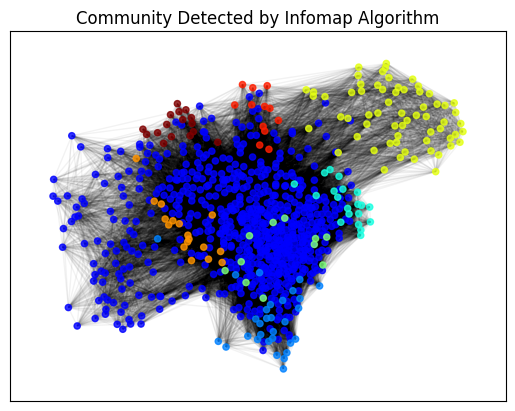

In [17]:
# create an Infomap instance and add links from networkx graph
infomapWrapper = infomap.Infomap("--two-level --directed")
for edge in G.edges():
    infomapWrapper.addLink(*edge)

# run the Infomap algorithm
infomapWrapper.run()

# get the best partition and assign communities to nodes in networkx graph
partition = {}
for node in infomapWrapper.iterTree():
    if node.isLeaf():
        partition[node.physicalId] = node.moduleIndex()

# draw the network with communities
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
fig = plt.figure()
for com in set(partition.values()):
    count += 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size=20,
                           node_color=[count/size]*len(list_nodes),
                           cmap=plt.cm.get_cmap('jet'), vmin=0., vmax=1.,
                           alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.05)
plt.title("Community Detected by Infomap Algorithm")
fig.savefig("CommunityDetection.png")

In [18]:
modularity = infomapWrapper.getCodelength()
print(modularity/100)

0.07230892443399202


##**GRAPH NEURAL NETWORKS (GNN):** 

##1) GCN:
A GCN consists of a series of graph convolutional layers that apply a trainable transformation to each node's feature vector by aggregating the features of its neighboring nodes in the graph. The output of each layer is a new feature vector for each node that captures information about its local neighborhood. This process is repeated for multiple layers, with the output of each layer being the input to the next layer.

In [21]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import pandas as pd

# Assuming you have two datasets: similarity_data and target_data
# Load the datasets
similarity_data = pd.read_csv('/content/SS-Butterfly_weights.csv')
target_data = pd.read_csv('/content/SS-Butterfly_labels.csv')

# Prepare the edge_index tensor
node1 = similarity_data['# NodeID1'].values.astype(int)
node2 = similarity_data['NodeID2'].values.astype(int)
edges = torch.tensor([node1, node2], dtype=torch.long)

# Prepare the edge_weight tensor
edge_weight = torch.tensor(similarity_data['Image similarity weight'].values, dtype=torch.float)

# Prepare the feature matrix
num_nodes = similarity_data[['# NodeID1', 'NodeID2']].max().max() + 1
x = torch.eye(num_nodes)  # Identity matrix as initial node features

# Prepare the target labels
target_labels = target_data['Species'].values
target_labels = torch.tensor(target_labels - 1, dtype=torch.long)

# Create the graph data object
data = Data(x=x, edge_index=edges, edge_attr=edge_weight, y=target_labels)

# Define the GNN model
class GNN(torch.nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, num_classes)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = self.conv1(x, edge_index, edge_attr)
        x = F.relu(x)
        x = self.conv2(x, edge_index, edge_attr)
        return F.log_softmax(x, dim=1)

# Set the hyperparameters
hidden_dim = 16
target_classes = len(target_data['Species'].unique())

# Instantiate the model
model = GNN(x.size(1), hidden_dim, target_classes)

# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Train the model for a certain number of epochs
num_epochs = 200
for epoch in range(num_epochs):
    loss = train()
    print('Epoch: {:03d}, Loss: {:.4f}'.format(epoch, loss))

# Evaluate the model on the test set
model.eval()
test_output = model(data)
test_pred = test_output.argmax(dim=1)
accuracy = (test_pred == data.y).sum().item() / len(data.y)
print('Accuracy: {:.4f}'.format(accuracy))

Epoch: 000, Loss: 2.3020
Epoch: 001, Loss: 2.2843
Epoch: 002, Loss: 2.2641
Epoch: 003, Loss: 2.2398
Epoch: 004, Loss: 2.2123
Epoch: 005, Loss: 2.1826
Epoch: 006, Loss: 2.1512
Epoch: 007, Loss: 2.1181
Epoch: 008, Loss: 2.0836
Epoch: 009, Loss: 2.0476
Epoch: 010, Loss: 2.0102
Epoch: 011, Loss: 1.9714
Epoch: 012, Loss: 1.9314
Epoch: 013, Loss: 1.8903
Epoch: 014, Loss: 1.8482
Epoch: 015, Loss: 1.8053
Epoch: 016, Loss: 1.7617
Epoch: 017, Loss: 1.7175
Epoch: 018, Loss: 1.6730
Epoch: 019, Loss: 1.6282
Epoch: 020, Loss: 1.5833
Epoch: 021, Loss: 1.5385
Epoch: 022, Loss: 1.4939
Epoch: 023, Loss: 1.4496
Epoch: 024, Loss: 1.4057
Epoch: 025, Loss: 1.3623
Epoch: 026, Loss: 1.3195
Epoch: 027, Loss: 1.2773
Epoch: 028, Loss: 1.2357
Epoch: 029, Loss: 1.1949
Epoch: 030, Loss: 1.1548
Epoch: 031, Loss: 1.1155
Epoch: 032, Loss: 1.0770
Epoch: 033, Loss: 1.0394
Epoch: 034, Loss: 1.0028
Epoch: 035, Loss: 0.9672
Epoch: 036, Loss: 0.9325
Epoch: 037, Loss: 0.8990
Epoch: 038, Loss: 0.8665
Epoch: 039, Loss: 0.8351


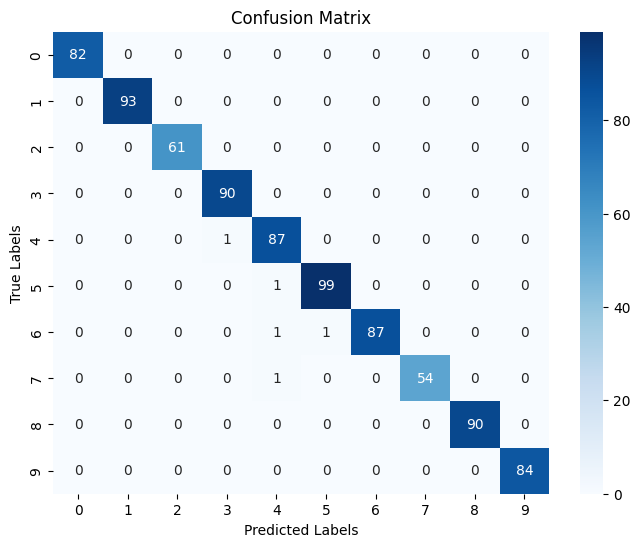

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Obtain the predicted labels
predicted_labels = test_pred.detach().numpy()

# Create a confusion matrix
cm = confusion_matrix(data.y.numpy(), predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##2) GAT:
GAT stands for Graph Attention Network. It is a type of neural network architecture that operates on graph-structured data and extends the idea of the convolutional operation to graphs.

In GAT, each node in the graph is associated with a feature vector, and the goal is to learn a representation of the graph that captures the structural relationships between the nodes. GAT achieves this by introducing attention mechanisms into the convolution operation.

In [23]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import Data

# Assuming you have two datasets: similarity_data and target_data
# Load the datasets
similarity_data = pd.read_csv('/content/SS-Butterfly_weights.csv')
target_data = pd.read_csv('/content/SS-Butterfly_labels.csv')

# Prepare the edge_index tensor
node1 = similarity_data['# NodeID1'].values.astype(int)
node2 = similarity_data['NodeID2'].values.astype(int)
edges = torch.tensor([node1, node2], dtype=torch.long)

# Prepare the edge_weight tensor
edge_weight = torch.tensor(similarity_data['Image similarity weight'].values, dtype=torch.float)

# Prepare the feature matrix
num_nodes = similarity_data[['# NodeID1', 'NodeID2']].max().max() + 1
x = torch.eye(num_nodes)  # Identity matrix as initial node features

# Prepare the target labels
target_labels = target_data['Species'].values
target_labels = torch.tensor(target_labels-1, dtype=torch.long)

# Create the graph data object
data = Data(x=x, edge_index=edges, edge_attr=edge_weight, y=target_labels)

# Define the GAT model
class GAT(torch.nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes, num_heads):
        super(GAT, self).__init__()
        self.conv1 = GATConv(num_features, hidden_dim, heads=num_heads)
        self.conv2 = GATConv(hidden_dim * num_heads, num_classes, heads=1)

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = F.dropout(x, training=self.training)
        x = self.conv1(x, edge_index, edge_attr)
        x = F.elu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index, edge_attr)
        return F.log_softmax(x, dim=1)

# Set the hyperparameters
hidden_dim = 16
num_classes = len(target_data['Species'].unique())
num_heads = 4

# Instantiate the model
model = GAT(x.size(1), hidden_dim, num_classes, num_heads)

# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train the model
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Train the model for a certain number of epochs
num_epochs = 200
for epoch in range(num_epochs):
    loss = train()
    print('Epoch: {:03d}, Loss: {:.4f}'.format(epoch, loss))

# Evaluate the model on the test set
model.eval()
test_output = model(data)
test_pred = test_output.argmax(dim=1)
accuracy = (test_pred == data.y).sum().item() / len(data.y)
print('Accuracy: {:.4f}'.format(accuracy))


Epoch: 000, Loss: 2.3055
Epoch: 001, Loss: 2.2834
Epoch: 002, Loss: 2.2582
Epoch: 003, Loss: 2.2282
Epoch: 004, Loss: 2.1955
Epoch: 005, Loss: 2.1684
Epoch: 006, Loss: 2.1474
Epoch: 007, Loss: 2.1247
Epoch: 008, Loss: 2.0477
Epoch: 009, Loss: 2.0341
Epoch: 010, Loss: 1.9938
Epoch: 011, Loss: 1.9643
Epoch: 012, Loss: 1.9077
Epoch: 013, Loss: 1.8057
Epoch: 014, Loss: 1.8106
Epoch: 015, Loss: 1.7118
Epoch: 016, Loss: 1.6500
Epoch: 017, Loss: 1.6279
Epoch: 018, Loss: 1.5880
Epoch: 019, Loss: 1.4840
Epoch: 020, Loss: 1.4166
Epoch: 021, Loss: 1.4663
Epoch: 022, Loss: 1.3356
Epoch: 023, Loss: 1.2165
Epoch: 024, Loss: 1.2007
Epoch: 025, Loss: 1.1632
Epoch: 026, Loss: 1.1043
Epoch: 027, Loss: 1.0221
Epoch: 028, Loss: 0.9361
Epoch: 029, Loss: 0.9576
Epoch: 030, Loss: 0.8992
Epoch: 031, Loss: 0.8016
Epoch: 032, Loss: 0.8496
Epoch: 033, Loss: 0.7568
Epoch: 034, Loss: 0.7524
Epoch: 035, Loss: 0.6694
Epoch: 036, Loss: 0.6362
Epoch: 037, Loss: 0.6218
Epoch: 038, Loss: 0.5143
Epoch: 039, Loss: 0.5376


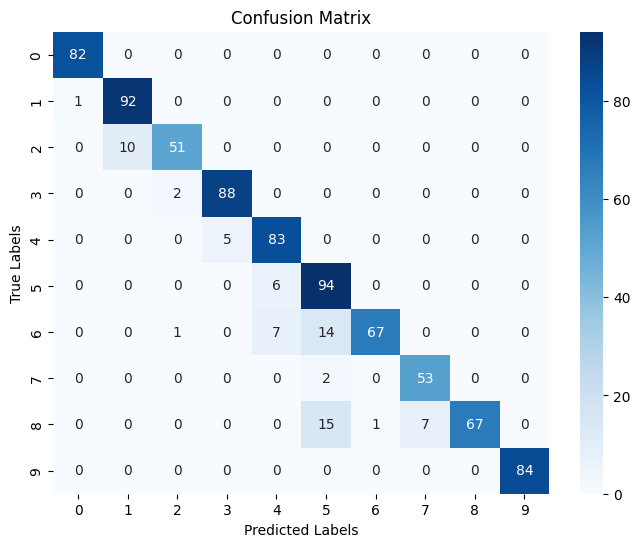

In [24]:
# Obtain the predicted labels
predicted_labels = test_pred.detach().numpy()

# Create a confusion matrix
cm = confusion_matrix(data.y.numpy(), predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##**Conclusion**
We ultimately aim to contribute to a better understanding of butterfly species diversity and facilitate conservation efforts by identifying distinct communities and their characteristics in the butterfly population.

Network Construction: The dataset is represented as a similarity network, where butterfly species are considered as nodes, and the image similarity weights represent the edges between them.

Spectral Clustering: Spectral clustering is employed to partition the butterfly similarity network into communities based on the spectral properties of the graph Laplacian matrix.

K-means Clustering: The resulting communities from spectral clustering are further refined using K-means clustering, which assigns nodes to the most similar cluster centroid.

Louvain Community Detection: Additionally, the Louvain algorithm is applied to detect communities in the butterfly similarity network based on the modularity optimization criterion.

Evaluation: The quality of the identified communities is assessed using various metrics such as modularity, silhouette score, or adjusted Rand index.

Visualization: The communities are visualized using network visualization techniques to gain insights into the butterfly species associations within and across communities.

By applying spectral clustering, K-means clustering, and Louvain community detection to the butterfly similarity network, this study aims to reveal hidden patterns and structure within the dataset. The identified communities can provide valuable information about species associations, ecological relationships, or evolutionary trends among butterfly species.